<a href="https://colab.research.google.com/github/ymuto0302/RW2025/blob/main/perceptron_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# パーセプトロン (線形モデル)
scikit-learn を利用したパーセプトロンの実装を示す。

accuracy: 0.9


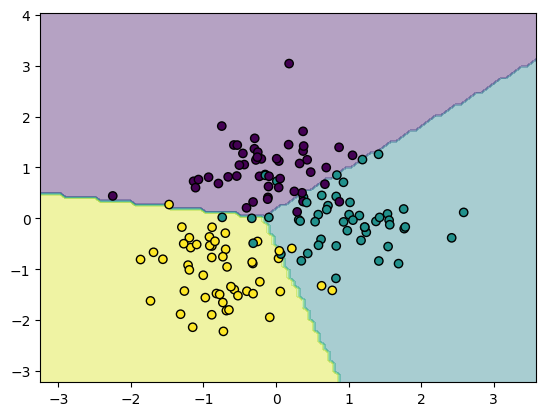

In [ ]:
'''
パーセプトロン
'''
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

# 3クラス，２次元のデータを生成する
# 線形分離できないよう，cluster_std を大きめにとる
X, y = make_blobs(n_samples=500, centers=3, n_features=2,
                                cluster_std=4.0, random_state=42)

# 訓練データとテストデータに分割 (訓練:テスト=7:3)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, stratify=y)

# スケーリング
# perceptron では値の大きい特徴量ほど重みの更新幅が大きくなるため，
# 基本的にスケーリングが必要
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# モデルの構築
#  Perceptron() のパラメータとして tol=1e-03, eta0=0.1 を設定してもよい
model = Perceptron(max_iter=120)

# モデルの学習
model.fit(X_train_std, y_train)

# 予測
predictions = model.predict(X_test_std)

# 評価
print("accuracy:", np.mean(predictions == y_test))

# 決定境界の描画
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
fig, ax = plt.subplots() # ax を取得するため subplots を使う
DecisionBoundaryDisplay.from_estimator(model, X_test_std,
                                       alpha=0.4, ax=ax) # 決定境界の描画
ax.scatter(X_test_std[:, 0], X_test_std[:, 1], c=y_test, edgecolor='black') # テストサンプルを描画

---
## step-by-step によるコードの解説

### ライブラリのインポート
冒頭の import 文は，この後の処理に必要なモジュールの読み込みを行う機能を提供する。

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

- `import numpy as np` : numpy を np という名前で読み込む。終盤の平均の計算に用いる。
- `from sklearn.datasets import make_blobs` : 指定した数のクラスタ状の人工データセットを生成する関数
- `from sklearn.linear_model import Perceptron` : 識別器であるパーセプトロンを利用するための import 文
- `from sklearn.model_selection import train_test_split` : データセットを訓練用・テスト用に分割する train_test_split を読み込むための import 文

### データ生成 ＆ 訓練データとテストデータへの分割 ＆ スケーリング
1. `make_blobs()` を用いて，２次元３クラスのデータセットを生成する。なお，scikit-learn の流儀に従い，特徴量を変数 `X` へ，ラベルを変数 `y` へ代入している。
1. `train_test_split()` を用いて，訓練データとテストデータに 7:3 の割合で分割する。
1. パーセプトロンでは値の大きい特徴量ほど重みの更新幅が大きくなるため，基本的にスケーリングが必要となる。ここでは `StandardScaler()` を用いて標準化している。

In [ ]:
# 3クラス，２次元のデータを生成する
# 線形分離できないよう，cluster_std を大きめにとる
X, y = make_blobs(n_samples=500, centers=3, n_features=2,
                                cluster_std=4.0, random_state=42)

# 訓練データとテストデータに分割 (訓練:テスト=7:3)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    stratify=y)

# スケーリング
# perceptron では値の大きい特徴量ほど重みの更新幅が大きくなるため，
# 基本的にスケーリングが必要
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

- `make_blobs(n_samples=500, centers=3, n_features=2,  cluster_std=4.0)`：クラスタ上の人工データを生成する関数である。各引数の意味は以下のとおり：
    - `n_samples=500` : 生成するサンプル数
    - `center=3` : クラスタ数
    - `n_features=2` : 特徴量の次元数
    - `cluster_std=4.0` : 各クラスタの広がり
- `train_test_split(X, y, test_size=0.3, stratify=y)` : データセットを訓練用データとテスト用データに分割するための関数である。第１引数の `X` は特徴量（本コードの場合，２次元データ）を，第２引数 `y` はラベルである。その他の引数の意味は以下のとおり：
    - `test_size=0.3` : 訓練用データとテスト用データの比率を 7:3 として分割する。
    - `stratify=y` : ラベル毎の偏りが生じないよう，変数 `y` に含まれる値の分布に応じた分割を行う。
    
    - `train_test_split()` の返し値は「訓練データの特徴量, テストデータの特徴量, 訓練データのラベル, テストデータのラベル」の順で返される。
- スケーリング
    -  ここでは scikit-learn の `StandardScalar` を用いて，平均 0，分散 1 となるようスケーリングを行っている。
    - `sc.fit(X_train)` : 訓練データを用いて StandardScalar を学習させる
    - その後に `sc.transform()` を用いて，訓練データとテストデータをスケーリングする   

### モデルの定義・学習・予測
下記がパーセプトロンの学習および学習済みモデルを用いた予測を行う，本コードの核心の部分である。

In [ ]:
# モデルの構築
#  Perceptron() のパラメータとして tol=1e-03, eta0=0.1 を設定してもよい
model = Perceptron(max_iter=120)

# モデルの学習
model.fit(X_train_std, y_train)

# 予測
predictions = model.predict(X_test_std)

- `model = Perceptron()` : パーセプトロンを定義(インスタンス化)する。ここでは最大反復回数 (`max_iter`) を 120 に設定した。
- `model.fit()` : scikit-learn では，モデルの学習に `fit()` 関数を用いる。与えるパラメータは訓練データの特徴量とラベルである。
- `mode.predict()` : テストデータの特徴値を渡し，各特徴がいずれのクラスに属するかを予測させる。scikit-learn では予測（または分類）に `predict()` 関数を用いる。`predict()` 関数の返し値は，予測値の格納された配列である。

### モデルの評価
変数 predictions に予測されたラベル値が収められている。これを正解ラベル y_test と比較し，正解した値の割合を求める。

In [ ]:
# 評価
print("accuracy:", np.mean(predictions == y_test))

### (おまけ) 決定境界の描画
scikit-learn には決定境界を可視化するクラスとして `DecisionBoundaryDisplay` が存在する。このコードの解説は，機械学習やデータサイエンスの学習の本質から外れるため，その解説を省略する。

In [ ]:
# 決定境界の描画
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
fig, ax = plt.subplots() # ax を取得するため subplots を使う
DecisionBoundaryDisplay.from_estimator(model, X_test_std,
                                       alpha=0.4, ax=ax) # 決定境界の描画
ax.scatter(X_test_std[:, 0], X_test_std[:, 1], c=y_test, edgecolor='black') # テストサンプルを描画